In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/list-of-manufacturing-companies-by-revenue/List of largest manufacturing companies by revenue.csv


<h1 style="color: blue; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Top Manufacturing companies 2022</h1>

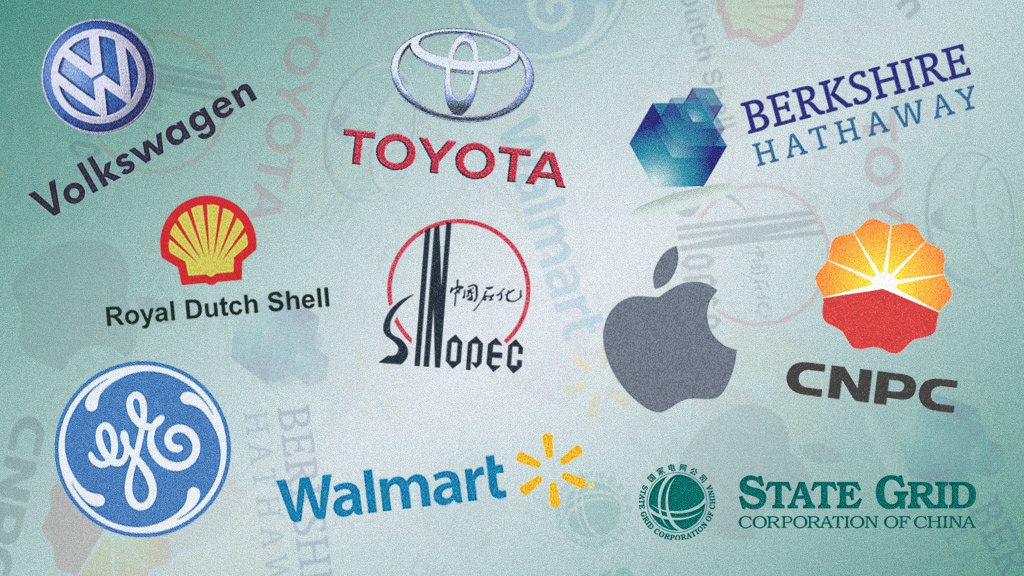

In [2]:
import pandas as pd
import numpy  as np 
import matplotlib.pyplot as plt 
import seaborn as sns
pd.options.display.max_columns=50
sns.set(style = "dark",rc = {"axes.facecolor":"#DCCBE3"})

In [3]:
df=pd.read_csv("/kaggle/input/list-of-manufacturing-companies-by-revenue/List of largest manufacturing companies by revenue.csv")
df.sample(5)

,Unnamed: 0,No.,Company,Industry,Revenue (by US$ billion),Headquarters
1,1,2,Toyota Group,"Engineering, various",256.721,Japan
6,6,7,Cardinal Health,Pharmaceuticals,152.922,United States
34,34,35,Procter & Gamble,Consumer goods,70.950,United States
23,23,24,Sony,Electronics,84.893,Japan
25,25,26,Hitachi,"Engineering, various",82.334,Japan


## Workflow
- Understanding of data
- Data cleaning
- Exploratory Data Analysis
- Insights

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Understanding the data</h1>

In [4]:
# checking shape of data
df.shape

(50, 6)

> ## There are **50 rows and 6 columns** 

In [5]:
# Fetching column names
df.columns

Index(['Unnamed: 0', 'No.', 'Company', 'Industry', 'Revenue (by US$ billion)',
       'Headquarters'],
      dtype='object')

In [6]:
# Checking basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                50 non-null     int64  
 1   No.                       50 non-null     int64  
 2   Company                   50 non-null     object 
 3   Industry                  50 non-null     object 
 4   Revenue (by US$ billion)  50 non-null     float64
 5   Headquarters              50 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 2.5+ KB


In [7]:
# Checking missing values 
df.isnull().sum()

Unnamed: 0                  0
No.                         0
Company                     0
Industry                    0
Revenue (by US$ billion)    0
Headquarters                0
dtype: int64

> ## **No Missing values** are there

<AxesSubplot:>

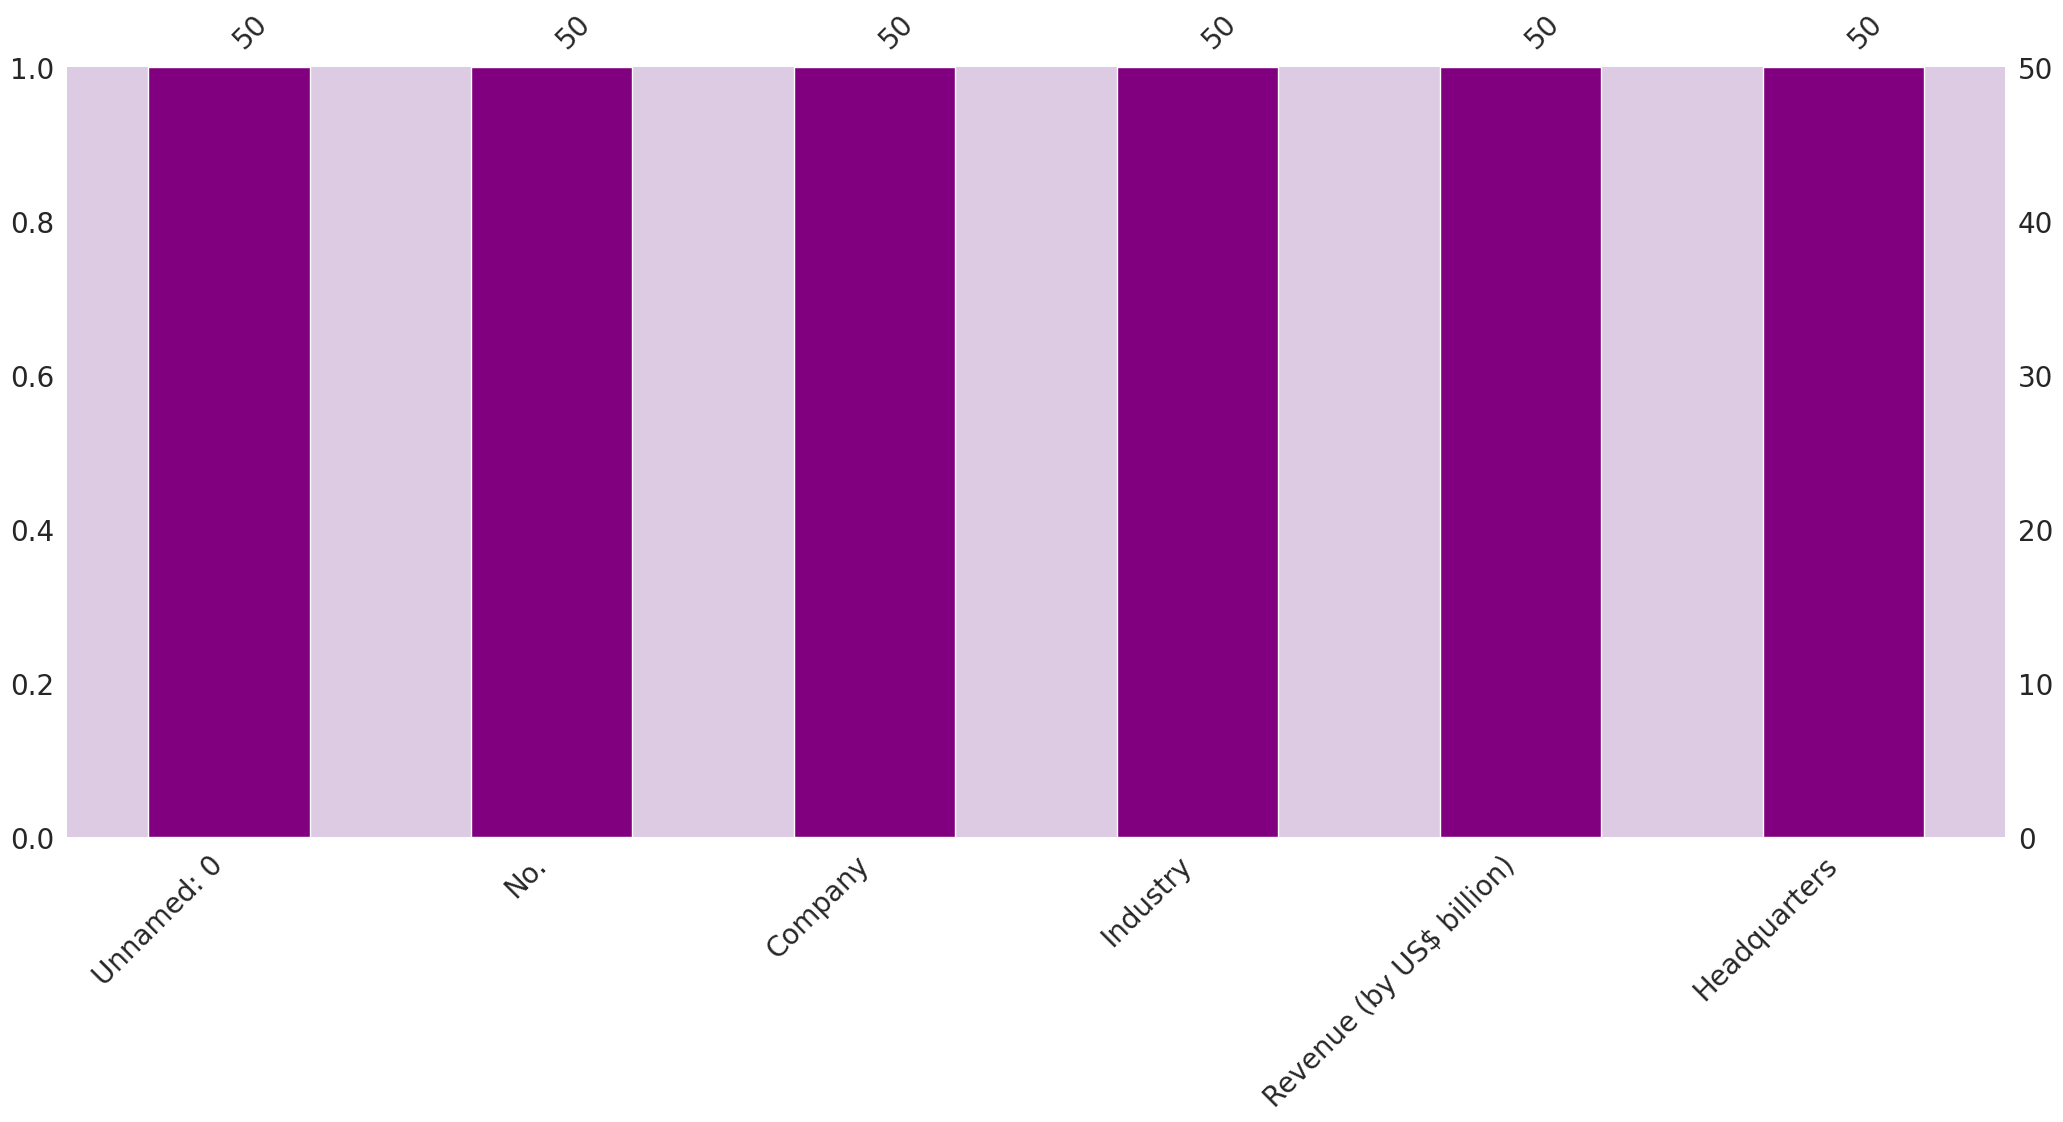

In [8]:
# Checking missing values visually
import missingno as msno
msno.bar(df,fontsize = 20 ,color='purple' )

> ## **No Missing values** are there

In [9]:
# Checking basic stats
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,50.0,24.50000,14.577380,0.000,12.250,24.500,36.750,49.000
No.,50.0,25.50000,14.577380,1.000,13.250,25.500,37.750,50.000
Revenue (by US$ billion),50.0,102.17452,52.939932,56.587,67.589,82.339,119.355,274.515


In [10]:
df.describe(include = "object").T

,count,unique,top,freq
Company,50,50,Apple,1
Industry,50,17,Automotive,12
Headquarters,50,12,United States,15


<AxesSubplot:>

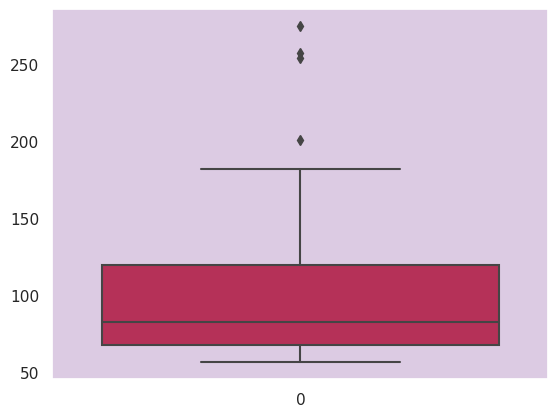

In [11]:
# Checking outliers in revenue
sns.boxplot(df["Revenue (by US$ billion)"],palette="rocket")

> ## There are **outliers** present in the data 

<AxesSubplot:>

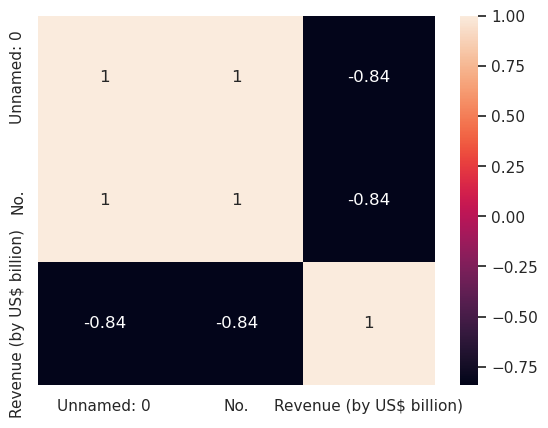

In [12]:
# Checking correleation
sns.heatmap(df.corr(),annot = True)

In [13]:
# Checking unique values
for i in df.columns:
    print(i,"-------",df[i].unique(),"----------",df[i].nunique())

Unnamed: 0 ------- [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] ---------- 50
No. ------- [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] ---------- 50
Company ------- ['Apple' 'Toyota Group' 'Volkswagen Group' 'Samsung Electronics' 'Foxconn'
 'Mercedes-Benz Group' 'Cardinal Health'
 'China Railway and Engineering Group' 'Huawei' 'Ford' 'Honda'
 'General Motors' 'Mitsubishi' 'BMW' 'SAIC Motor' 'China Minmetals'
 'FAW Group' 'Hengli Group' 'China Baowu Steel Group' 'Dell' 'Nestle'
 'Hyundai Motor Company' 'Dongfeng Motor Group' 'Sony' 'Johnson & Johnson'
 'Hitachi' 'Bosch' 'General Electric' 'Intel' 'Sinopharm' 'Nissan' 'Enel'
 'IBM' 'Beijing Automotive Group' 'Procter & Gamble' 'PepsiCo' 'BASF'
 'Aviation Industry Corporation of China' 'Lockheed Martin'
 'Hoffmann-La Roche' 

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Data Cleaning </h1>

In [14]:
df.sample()

,Unnamed: 0,No.,Company,Industry,Revenue (by US$ billion),Headquarters
45,45,46,Boeing,Aerospace & Defense,58.158,United States


In [15]:
#Dropping the unnamed and no columns
df.drop(columns=["Unnamed: 0","No."],inplace=True)

> ## **Drop columns** unnamed and No as they are not providing any usefull info

In [16]:
# splitting the industry and taking only mains
df["Industry"]=df["Industry"].str.split(",",expand=True)[0]

> ## Splitted the Industry columns 

In [17]:
# splitting the Headquarters and taking only mains branches
df["Headquarters"]=df["Headquarters"].str.split("/",expand=True)[0]

> ## Splitted the Headquarters columns and only the main headquaters location are there

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">EDA & Insights </h1>

In [18]:
df.sample()

,Company,Industry,Revenue (by US$ billion),Headquarters
15,China Minmetals,Metals,102.014,China


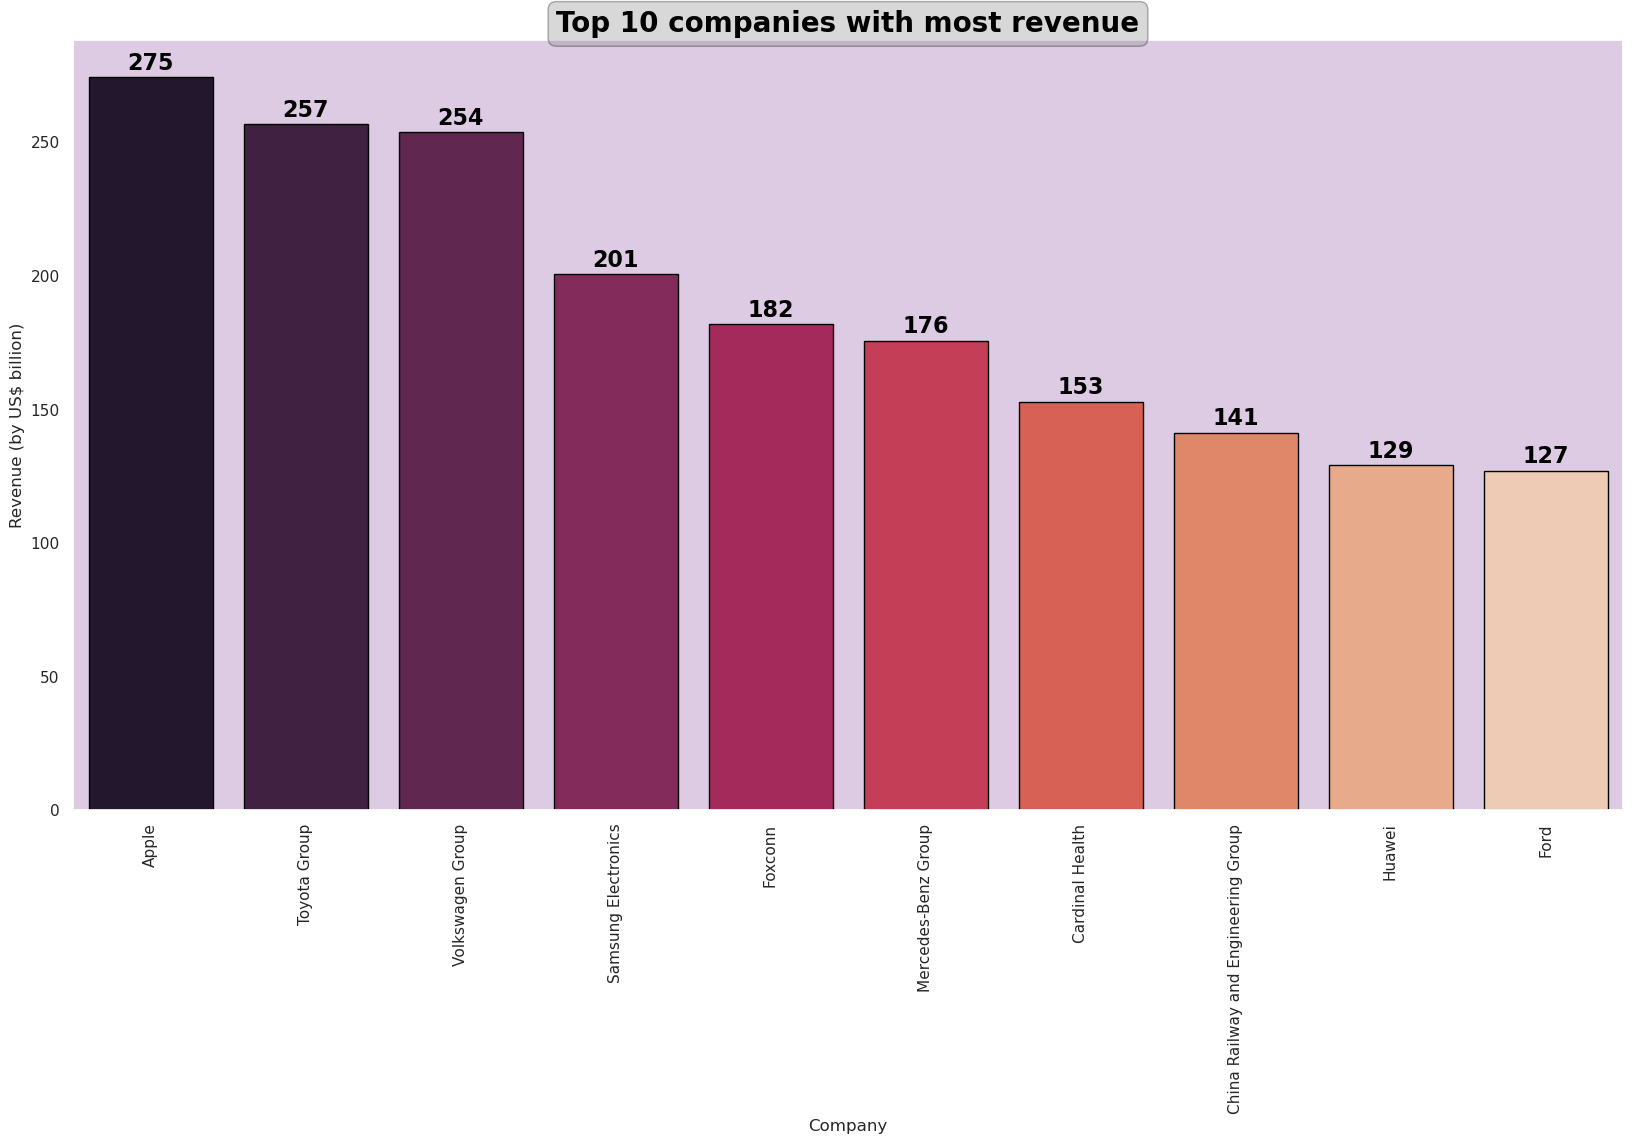

In [19]:
# Which top 10 companies and generated most revenue
x=df.groupby("Company")["Revenue (by US$ billion)"].sum().sort_values(ascending=False).reset_index().head(10)
plt.figure(figsize=(20,10))
ax=sns.barplot(x="Company",y="Revenue (by US$ billion)",data=x,edgecolor="black",estimator=sum,palette="rocket")
plt.title('Top 10 companies with most revenue', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'))
plt.xticks(rotation=90);
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16 ,color='black',fontweight= 'bold',
                xytext = (0,10),
                textcoords = 'offset points')

> ## ➡️ **Apple, Toyota and Volkswagen** have generated most revenue with **above 250 Billion Dollars**

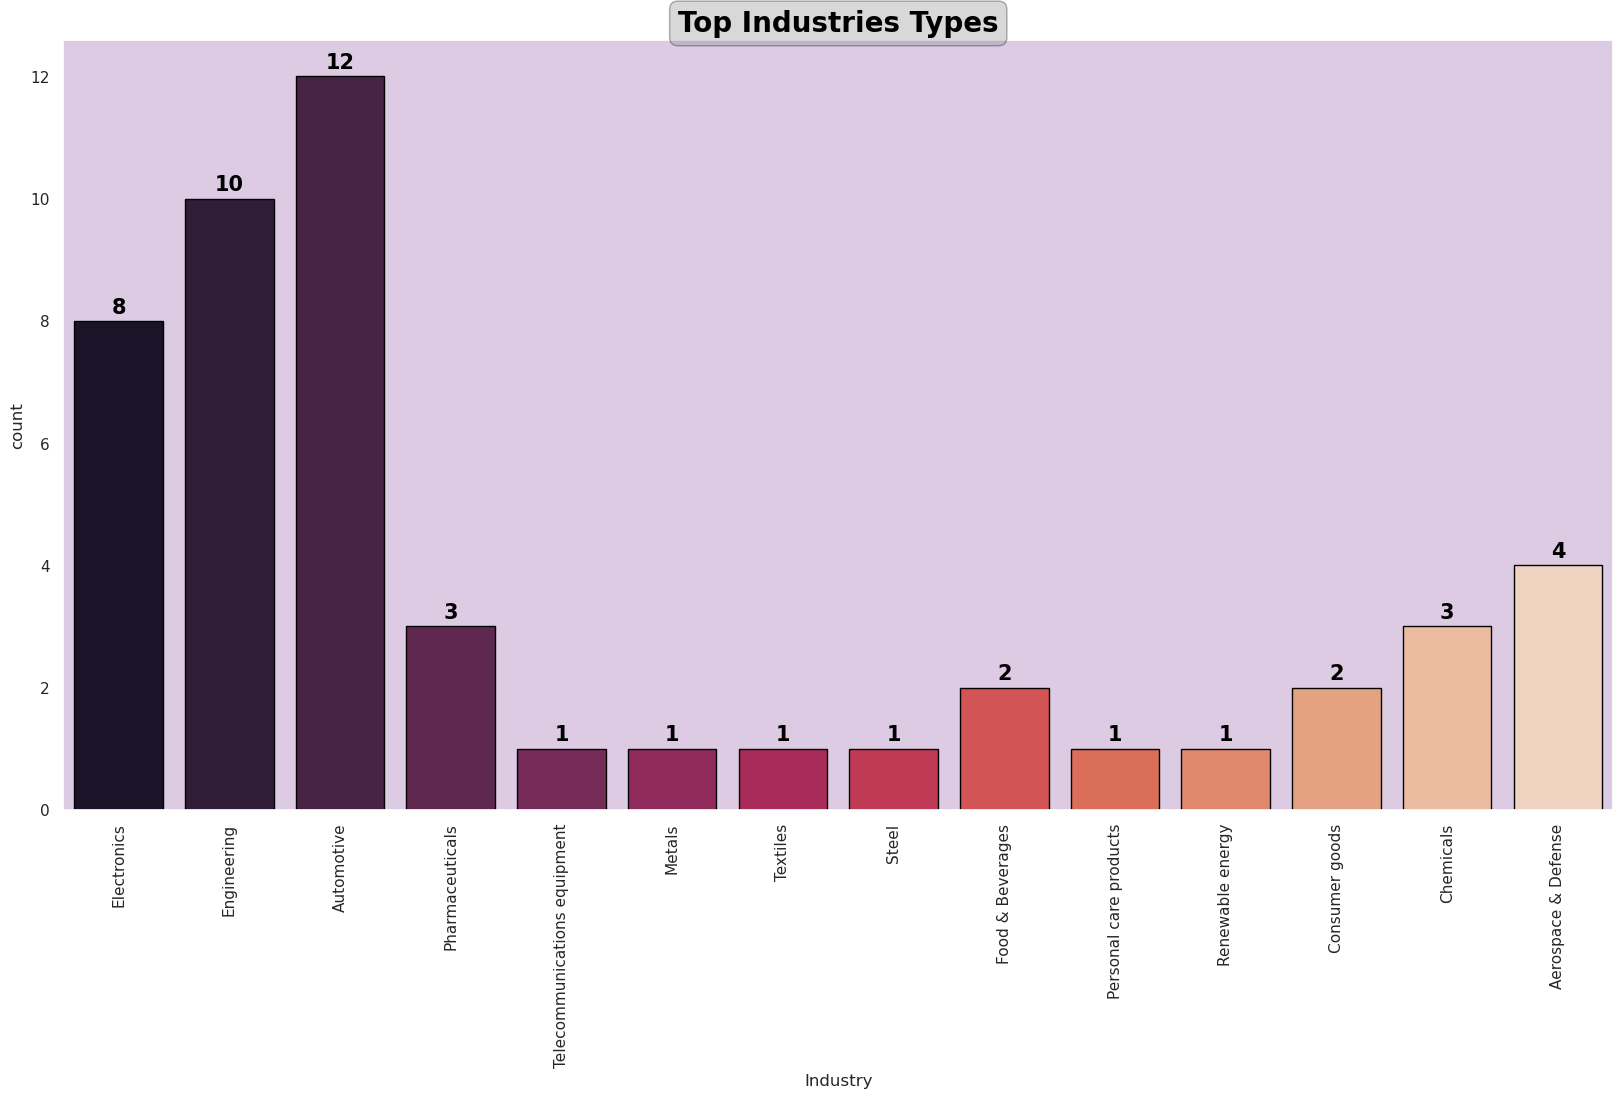

In [20]:
# Which are the Top Industries Types
plt.figure(figsize=(20,10))
ax=sns.countplot(x="Industry",edgecolor="black",data=df,palette="rocket")
plt.title('Top Industries Types', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'));
plt.xticks(rotation=90);
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=15 ,color='black',fontweight= 'bold',
                xytext = (0,10),
                textcoords = 'offset points')

> ## ➡️ Companies with Industry type **Automotive and Engineering** were most

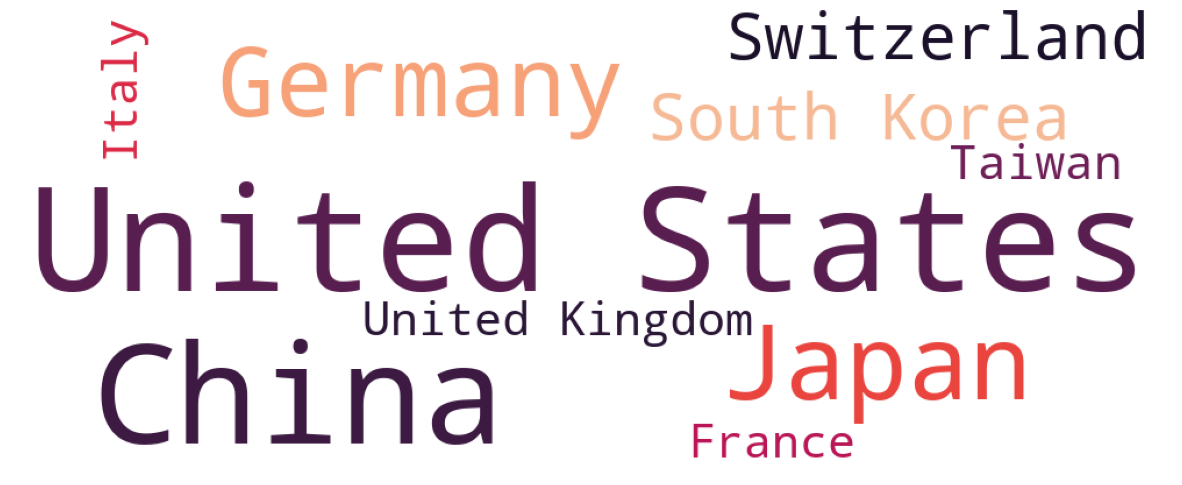

In [21]:
from wordcloud import WordCloud as word
d=df["Headquarters"].value_counts()
wc = word(background_color='white', width=1000, height=400, colormap="rocket" )
wc.generate_from_frequencies(d)
plt.figure(figsize=(15,10),dpi=100)
plt.imshow(wc)
plt.axis('off')
plt.show()

> ## ➡️ Most of the companies have their **Headquarters** in **United States**

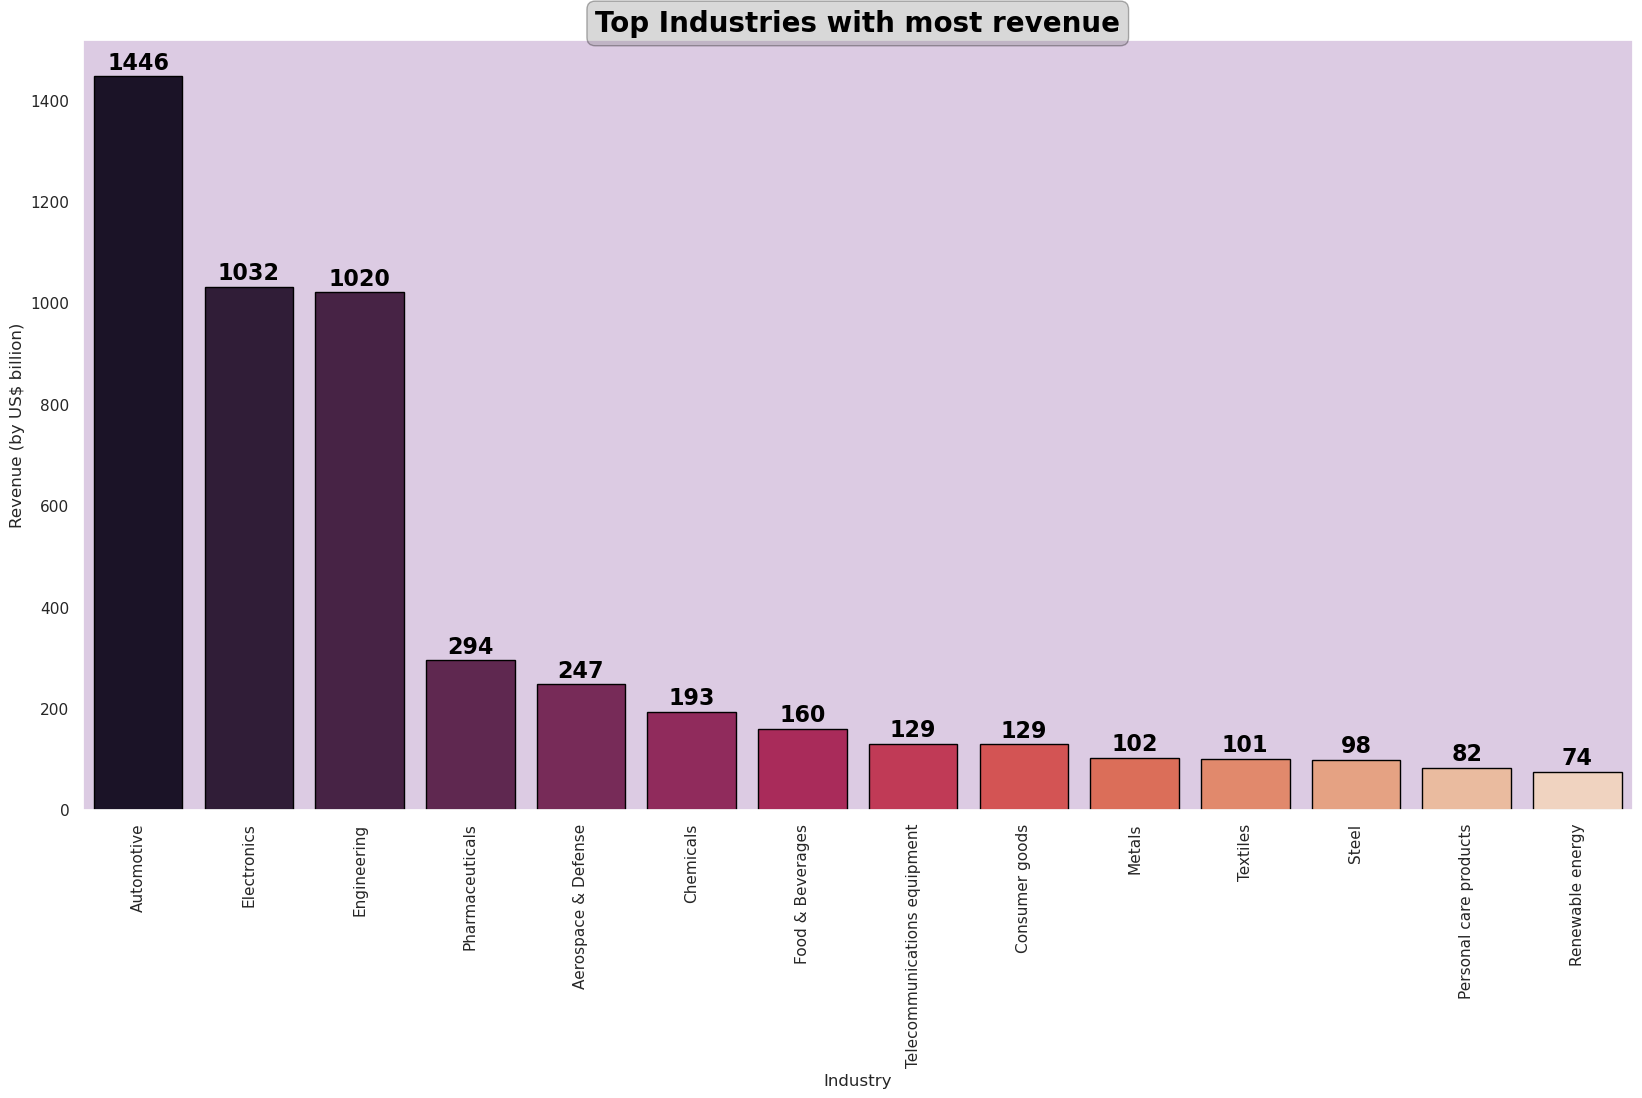

In [22]:
# Which top Top Industries which generated most revenue
x=df.groupby("Industry")["Revenue (by US$ billion)"].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(20,10))
ax=sns.barplot(x="Industry",y="Revenue (by US$ billion)",data=x,edgecolor="black",estimator=sum,palette="rocket")
plt.title('Top Industries with most revenue', fontdict={'fontsize': 20, 'color': 'black', 'fontweight': 'bold'}, bbox=dict(boxstyle='round', facecolor='grey', alpha=0.30,edgecolor='black'))
plt.xticks(rotation=90);
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',fontsize=16 ,color='black',fontweight= 'bold',
                xytext = (0,10),
                textcoords = 'offset points')

> ## ➡️ **Automotive Industries** have generated the most Revenue with **1446 billion** in total

In [23]:
df.sample()

,Company,Industry,Revenue (by US$ billion),Headquarters
22,Dongfeng Motor Group,Automotive,86.85,China


In [24]:
df[df["Revenue (by US$ billion)"]>120].style.background_gradient(cmap="rocket")

,Company,Industry,Revenue (by US$ billion),Headquarters
0,Apple,Electronics,274.515000,United States
1,Toyota Group,Engineering,256.721000,Japan
2,Volkswagen Group,Automotive,253.965000,Germany
3,Samsung Electronics,Electronics,200.734000,South Korea
4,Foxconn,Electronics,181.945000,Taiwan
5,Mercedes-Benz Group,Automotive,175.827000,Germany
6,Cardinal Health,Pharmaceuticals,152.922000,United States
7,China Railway and Engineering Group,Engineering,141.383000,China
8,Huawei,Telecommunications equipment,129.183000,China
9,Ford,Automotive,127.144000,United States


> ## ➡️ These are the Top Companies who have generated Above **120 Billion Dollars Revenue**

In [25]:
df[df["Revenue (by US$ billion)"]<100].tail(10).style.background_gradient(cmap="rocket")

,Company,Industry,Revenue (by US$ billion),Headquarters
40,Siemens,Engineering,63.935000,Germany
41,Sinochem,Chemicals,63.544000,China
42,Panasonic,Engineering,63.191000,Japan
43,Lenovo,Electronics,60.742000,China
44,ChemChina,Chemicals,60.491000,China
45,Boeing,Aerospace & Defense,58.158000,United States
46,Unilever,Consumer goods,57.797000,United Kingdom
47,Airbus,Aerospace & Defense,56.872000,France
48,Hewlett-Packard,Electronics,56.639000,United States
49,Raytheon Technologies,Engineering,56.587000,United States


> ## ➡️ These are the **Least 10 Companies** who have generated the **least amount of revenue**

Headquarters
United States     1462.859
China             1267.642
Japan              807.090
Germany            757.448
South Korea        288.889
Taiwan             181.945
Switzerland        154.137
Italy               74.047
United Kingdom      57.797
France              56.872
Name: Revenue (by US$ billion), dtype: float64


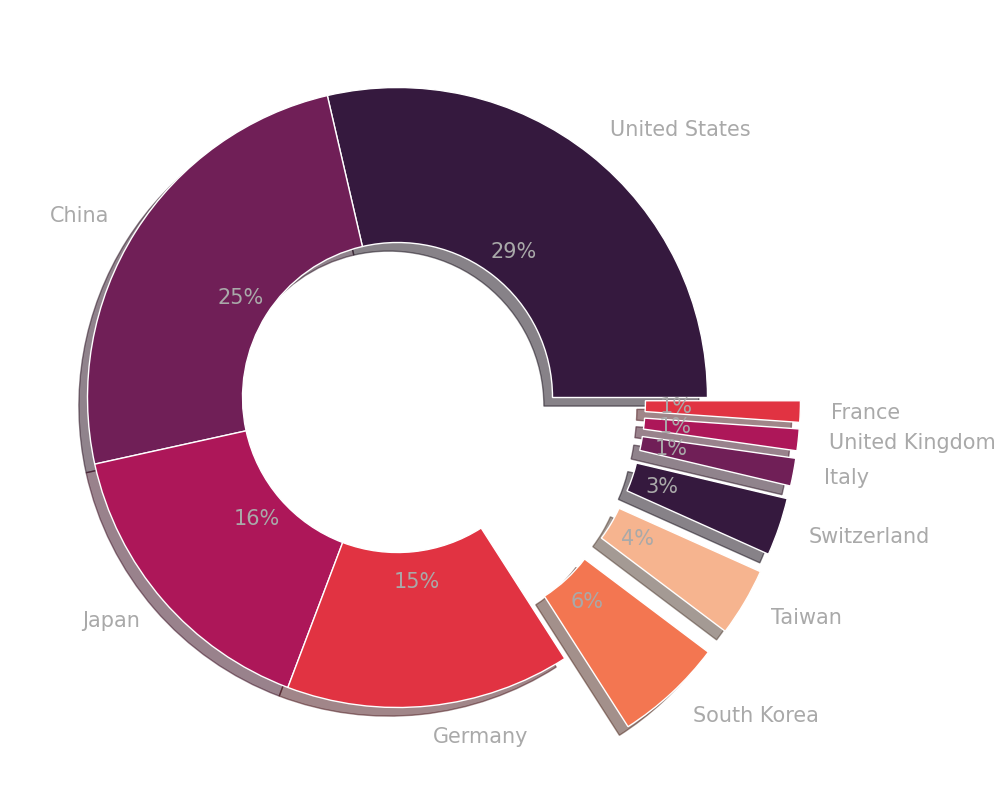

In [26]:
# Which State Headquarters generated most revenue
x=df.groupby("Headquarters")["Revenue (by US$ billion)"].sum().sort_values(ascending=False)
print(x)
color=sns.color_palette("rocket")
plt.figure(figsize=(10,15))
plt.pie(x,labels=x.index,autopct="%0.0f%%",textprops ={"color":"darkgrey","fontsize":15},wedgeprops={"width":0.5},colors=color,shadow=True,explode=[0,0,0,0,0.3,0.3,0.3,0.3,0.3,0.3]);

> ## ➡️ In **United States** headquarters company has generated Most Revenue which is **1462 Billion Dollars**

<h1 style="color: black; text-align:center; background-color: #dddddd; border: 1px solid black; padding: 10px;font-size: 36px;">Analysis Finished </h1>

<h1 style="color: red; text-align:center; padding: 10px; font-family:cursive; font-size: 48px;">If You Like it please do upvote📌 & Comment💬</h1>